In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from scipy import stats

In [6]:
df=pd.read_csv("titanic_train.txt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#checking for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Since Cabin is having more than 77% missing values, we can drop that column

In [10]:
df['PassengerId'].value_counts().sum()

891

From the above output, we can observe that PassengerId is unique. So we can drop that column
Also 'survived' column doesnot depend on Name of the passenger.Hence we can drop that column too.
Ticket number also doesnot impact on output('Survived') columns. So, this can also be dropped

In [11]:
#Dropping Cabin,PassengerId and Name column
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Filling the missing values in Age column by using mean value
df['Age'].fillna(value=df['Age'].mean(),inplace=True)


In [14]:
#Filling missing values in Embarked by forward_fill method 
df['Embarked'].fillna(method='ffill',inplace=True)

In [15]:
#checking for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
df['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

## EDA

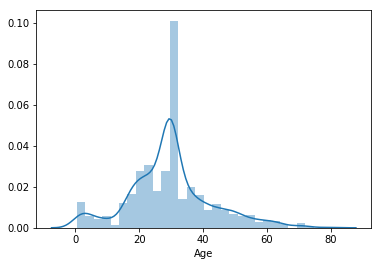

In [21]:
sns.distplot(df['Age'])
plt.show()

From the above distribution plot we can observe that most of the passengers' age lie between 25-40

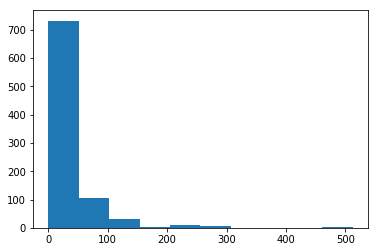

In [22]:
plt.hist(df['Fare'])
plt.show()

From the above histogram, we can see that ticket fare lies mostly within 100 units(Any currency)

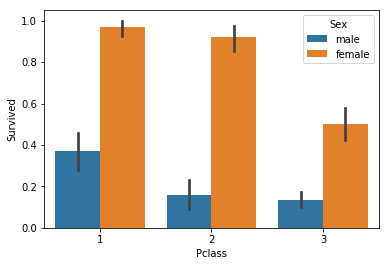

In [23]:
sns.barplot(df['Pclass'],df['Survived'],hue=df['Sex'])
plt.show()

From the above barplot, it can be observed that more female passengers of 1st and 2nd class survived as compared with females of 3rd class tickets. Also it can be observed that males of 3rd class tickets werenot saved more as compared to males of the above two classes.So survival rate is directly proportional to Passenger class.

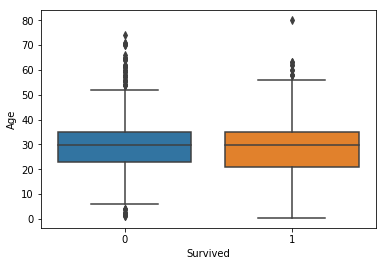

In [24]:
sns.boxplot(df['Survived'],df['Age'])
plt.show()

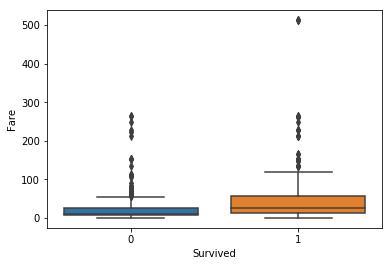

In [25]:
sns.boxplot(df['Survived'],df['Fare'])
plt.show()

From the above graph, we can see that survival rate is more for people who had paid higher fare(Higher class).

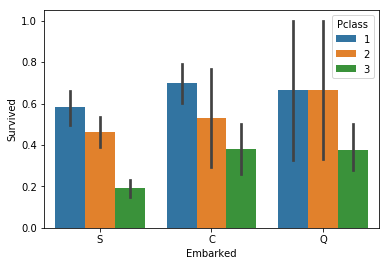

In [26]:
sns.barplot(df['Embarked'],df['Survived'],hue=df['Pclass'])
plt.show()

From the above barplot, we can see that Passengers who had boarded from Southampton with 1st and 2nd classes have more survival rates as compared to other two cities.

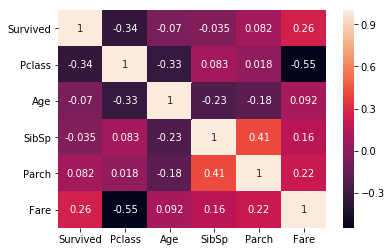

In [27]:
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heatmap, we can see that fare is more correlated with survived.

## Label Encoding

In [28]:
#Label for Pclass, Sex and Embarked
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
df.Sex=le.fit_transform(df['Sex'])


In [30]:
#To know which category is represented by which number.
le.classes_

array(['female', 'male'], dtype=object)

Female--->0
Male----->1

In [31]:
df.Pclass=le.fit_transform(df['Pclass'])
le.classes_

array([1, 2, 3], dtype=int64)

In [32]:
df.Embarked=le.fit_transform(df['Embarked'])
le.classes_

array(['C', 'Q', 'S'], dtype=object)

Here C--->0,
     Q--->1,
     S--->2

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.8 KB


In [35]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.253566
dtype: float64

We can see here that 'Fare' column has outliers which needs to be treated.

## Outlier Treatment

In [36]:
df1=df[(df['Fare']>(np.mean(df['Fare'])-3*np.std(df['Fare']))) & (df['Fare']<(np.mean(df['Fare'])+2.07*np.std(df['Fare'])))]

In [37]:
df1.skew()

Survived    0.534743
Pclass     -0.746191
Sex        -0.678796
Age         0.443803
SibSp       3.746918
Parch       2.912657
Fare        1.965017
Embarked   -1.315298
dtype: float64

In [38]:
df1.shape

(857, 8)

## Define X and Y

In [39]:
X=df1.drop(['Survived'],axis=1)

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,2
1,0,0,38.0,1,0,71.2833,0
2,2,0,26.0,0,0,7.9250,2
3,0,0,35.0,1,0,53.1000,2
4,2,1,35.0,0,0,8.0500,2


In [41]:
y=df1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train and Test Splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=101)

## Logistic Model

In [43]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [44]:
#Fitting the Logistic model
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
#Training data
y_pred_lgr_train=lgr.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
print(accuracy_score(y_train,y_pred_lgr_train))

0.7796327212020033


In [48]:
print(confusion_matrix(y_train,y_pred_lgr_train))

[[333  54]
 [ 78 134]]


In [49]:
print(classification_report(y_train,y_pred_lgr_train))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       387
           1       0.71      0.63      0.67       212

   micro avg       0.78      0.78      0.78       599
   macro avg       0.76      0.75      0.75       599
weighted avg       0.78      0.78      0.78       599



In [50]:
#Test Data
y_pred_lgr_test=lgr.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred_lgr_test))

0.8178294573643411


In [52]:
print(confusion_matrix(y_test,y_pred_lgr_test))

[[136  16]
 [ 31  75]]


In [53]:
print(classification_report(y_test,y_pred_lgr_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       152
           1       0.82      0.71      0.76       106

   micro avg       0.82      0.82      0.82       258
   macro avg       0.82      0.80      0.81       258
weighted avg       0.82      0.82      0.82       258



## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=30,max_depth=10,random_state=100)

In [55]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [56]:
# For train data
y_train_pred_dc=dc.predict(X_train)

In [57]:
accuracy_score(y_train,y_train_pred_dc)

0.8914858096828047

In [58]:
confusion_matrix(y_train,y_train_pred_dc)

array([[369,  18],
       [ 47, 165]], dtype=int64)

In [59]:
print(classification_report(y_train,y_train_pred_dc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       387
           1       0.90      0.78      0.84       212

   micro avg       0.89      0.89      0.89       599
   macro avg       0.89      0.87      0.88       599
weighted avg       0.89      0.89      0.89       599



In [60]:
#For test data
y_test_pred_dc=dc.predict(X_test)

In [61]:
accuracy_score(y_test,y_test_pred_dc)

0.8333333333333334

In [62]:
confusion_matrix(y_test,y_test_pred_dc)

array([[140,  12],
       [ 31,  75]], dtype=int64)

In [63]:
print(classification_report(y_test,y_test_pred_dc))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       152
           1       0.86      0.71      0.78       106

   micro avg       0.83      0.83      0.83       258
   macro avg       0.84      0.81      0.82       258
weighted avg       0.84      0.83      0.83       258



## Serialization

In [64]:
import pickle

In [65]:
#Saving the model
titanic_model = pickle.dumps(dc) 

In [66]:
#Load the model whenever required
dc_from_pickle = pickle.loads(titanic_model) 

In [67]:
#Use model for prediction
dc_from_pickle.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)